<a href="https://colab.research.google.com/github/aime-n/lasso-aprendizado/blob/main/analise_diamantes_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. INFORMAÇÕES DO GRUPO
---

Nomes e Números USP:

- Adriane Akemi Yamaguti - NUSP: 11915623
- Aimê Gomes da Nobrega  - NUSP: 11882429
- Ariel Bor Cheng Chen   - NUSP: 11877260
- Emerson Hideki Miady   - NUSP: 11207943
- Rafael Fragoso Marin   - NUSP: 11809318

# 1.0. Contexto

Este conjunto de dados clássico contém os preços e outros atributos de quase 54.000 diamantes.

O nosso objetivo é tentar prever os preços ideais para a venda dos diamantes, de acordo com algumas variáveis que irão ser descritas na seção 3.

Base de dados (Kaggle): clique [aqui](https://www.kaggle.com/datasets/shivam2503/diamonds).

# 2.0. IMPORTAÇÕES
---

## 2.1. Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

## 2.2. Dados

In [ ]:
import pandas as pd
# df = pd.read_csv('data/diamonds.csv')
df=pd.read_csv('https://raw.githubusercontent.com/aime-n/lasso-aprendizado/main/trab/data/diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# Retirando a primeira coluna (index)
df = df.iloc[:, 1:]
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 2.3. Funções

In [ ]:
def print_is_duplicated(df):
    """
    Função que verifica se os dados estão duplicados. Se sim,
    mostra a quantidade de dados duplicados.
    """
    confirmation = df.duplicated().values.any()
    print(f"Existem valores duplicados? {confirmation}")
    if confirmation == True:
        print(f"Existem no total {df.duplicated().sum()} linhas duplicadas.")
    else:
        print('Não existem linhas duplicadas.')

# 3.0. DESCRIÇÃO DOS DADOS
---

## 3.1. Descrição das variáveis

As descrições abaixo foram todas obtidas no site do dataset (Kaggle):

- ``price``: preço em dólares ($\$$326 até $\$$18,823).

- ``carat``: peso do diamante (0.2 até 5.01).*

- ``cut``: qualidade do corte na ordem crescente:*Fair*, *Good*, *Very Good*, *Premium* e *Ideal*

- ``color``: cor do diamante, do D (melhor) até o J (pior).

- ``clarity``: uma medida de quão claro o diamante é. Seguindo a ordem a seguir, vai do pior até o melhor: (I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF).

- ``x``: comprimento em mm (0 até 10.74).

- ``y``: largura em mm (0 até 58.9).

- ``z``: espessura em mm (0 até 31.8).

- ``depth``: Porcentagem da espessura = $\frac{z}{\frac{(x+y)}{2}}$ (43--79).

- ``table``: largura do topo do diamante em relação ao ponto mais largo (43--95).

->* **Obs.:** Não há especificações da unidade do peso, porém o chute é em libras, por conta dos dados serem de lá.

## 3.2. Tipos das variáveis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Os tipos das variáveis parecem fazer sentido.

## 3.3. Verificação de valores nulos

In [ ]:
# Soma de valores nulos por coluna
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Não existem valores nulos neste dataset, portanto nenhuma manipulação dos dados será necessária.

## 3.4. Valores duplicados

In [ ]:
# Verifica se existem valores duplicados
print_is_duplicated(df)

Existem valores duplicados? True
Existem no total 146 linhas duplicadas.


In [ ]:
# Porcentagem dos valores duplicados
duplicated_pct = round(df.duplicated().sum() / len(df) * 100, 2)
print(f"Existem {duplicated_pct}% linhas duplicadas neste dataset.")

Existem 0.27% linhas duplicadas neste dataset.


Como existem 0.27% linhas duplicadas no nosso conjunto, vamos excluí-las na seção 4.

## 3.5. Outliers

In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Observamos um desvio padrão muito alto na variável ``price``, sendo até maior que a própria média. Vamos verificar o boxplot com esses valores.

Resolvemos não retirar os outliers, pois os preços dos diamantes podem acabar variando muito, dependendo das outras características. Então assumimos que é são valores muito acima do esperado mas que são condizente com a realidade.

# 4.0. MANIPULAÇÃO DOS DADOS
---

## 4.1. Remoção dos valores duplicados

In [ ]:
# Remove as linhas duplicadas
df = df.drop_duplicates()

print(f"Este dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")
df.head()

Este dataset possui 53794 linhas e 10 colunas.


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# 5.0. ANÁLISE EXPLORATÓRIA DOS DADOS
---

## 5.1. Análise de uma variável

### 5.1.1. Variável Resposta

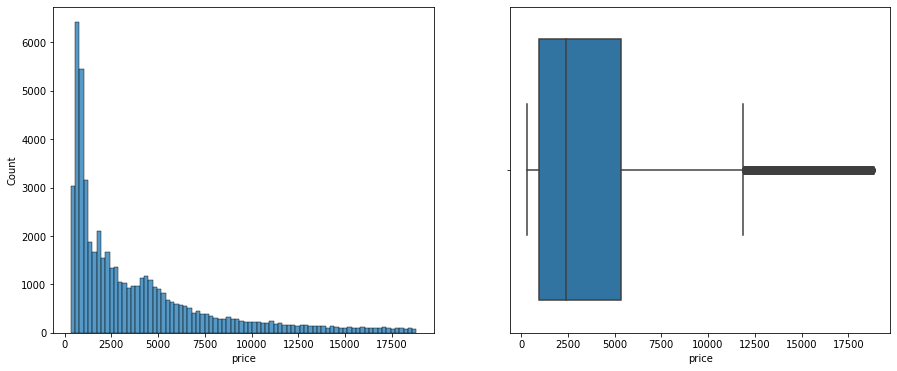

In [ ]:
fig=plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax=sns.histplot(x='price', data=df,palette="viridis")
plt.subplot(1,2,2)
ax=sns.boxplot(x='price', data=df)
plt.show()

## 5.1.2. Variáveis Categóricas

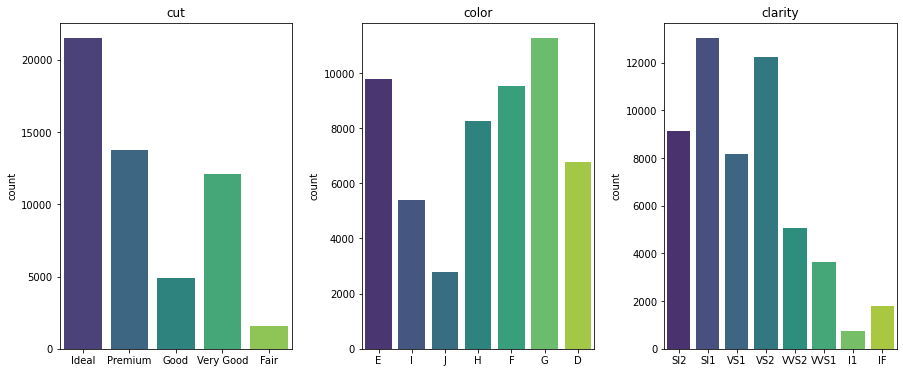

In [ ]:
cate=['cut','color','clarity']
fig=plt.figure(figsize=(15,6))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(1, 4):
    plt.subplot(1, 3, i)
    ax = sns.countplot(x=cate[i-1], data=df, palette="viridis", 
                       #order=np.unique(data[infos[i-1]].values).tolist()
                       )
    plt.xticks(rotation=0)
    plt.xlabel('')
    plt.title(cate[i-1])
plt.show()

## 5.1.3. Variáveis Quantitativas

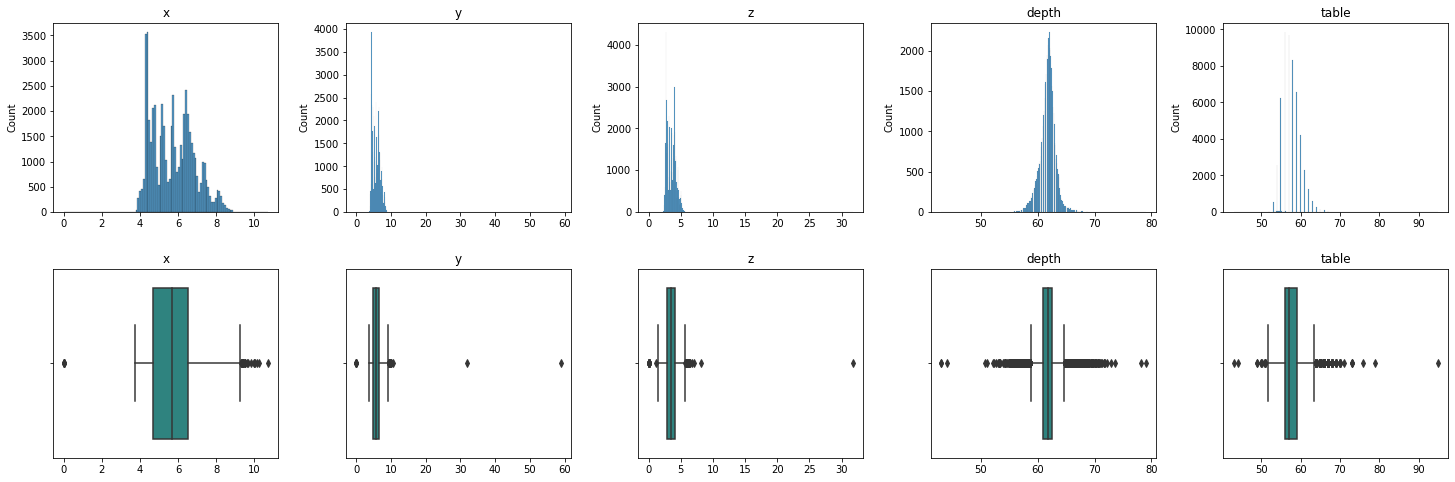

In [ ]:
quant=['x','y','z','depth','table']
fig=plt.figure(figsize=(25,8))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(1, 6):
    plt.subplot(2, 5, i)
    ax = sns.histplot(x=quant[i-1], data=df, palette="viridis", 
                       #order=np.unique(data[infos[i-1]].values).tolist()
                       )
    plt.xticks(rotation=0)
    plt.xlabel('')
    plt.title(quant[i-1])

for i in range(1, 6):
    plt.subplot(2, 5, i+5)
    ax = sns.boxplot(x=quant[i-1], data=df, palette="viridis", 
                       #order=np.unique(data[infos[i-1]].values).tolist()
                       )
    plt.xticks(rotation=0)
    plt.xlabel('')
    plt.title(quant[i-1])
plt.show()

## 5.2. Análise de duas variáveis

### 5.2.1. Variáveis Categóricas x price

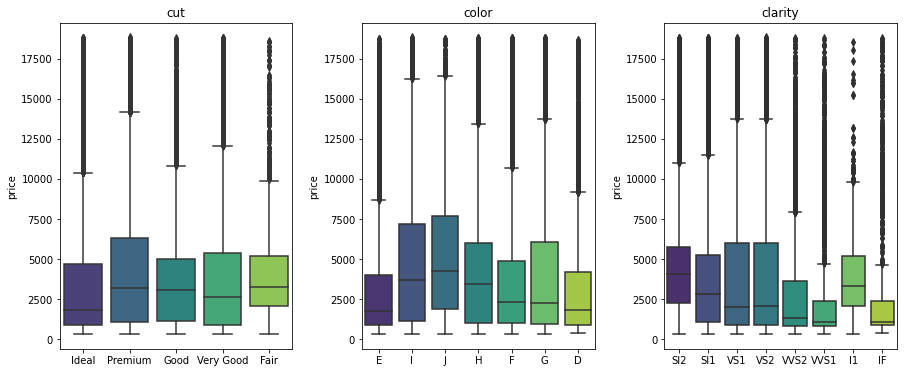

In [ ]:
cate=['cut','color','clarity']
fig=plt.figure(figsize=(15,6))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(1, 4):
    plt.subplot(1, 3, i)
    ax = sns.boxplot(y='price',x=cate[i-1], data=df, palette="viridis", 
                       #order=np.unique(data[infos[i-1]].values).tolist()
                       )
    plt.xticks(rotation=0)
    plt.xlabel('')
    plt.title(cate[i-1])
plt.show()

### 5.2.2. Variáveis Numéricas x price

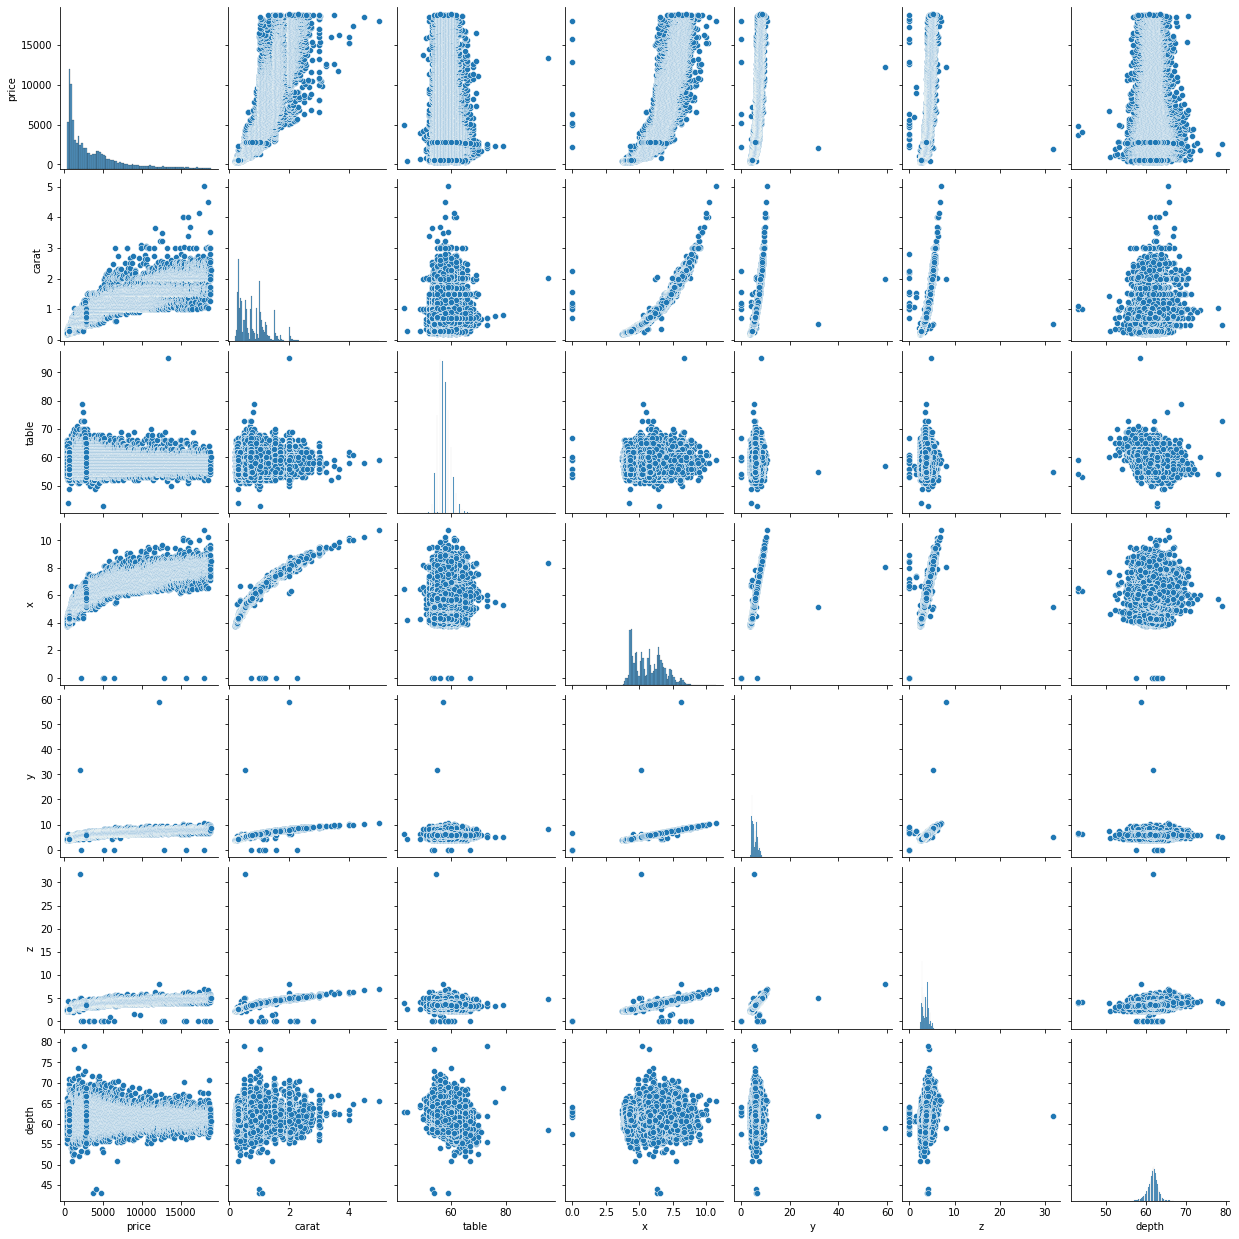

In [ ]:
sns.pairplot(df[['price', 'carat', 'table', 'x', 'y', 'z', 'depth']],palette="viridis");

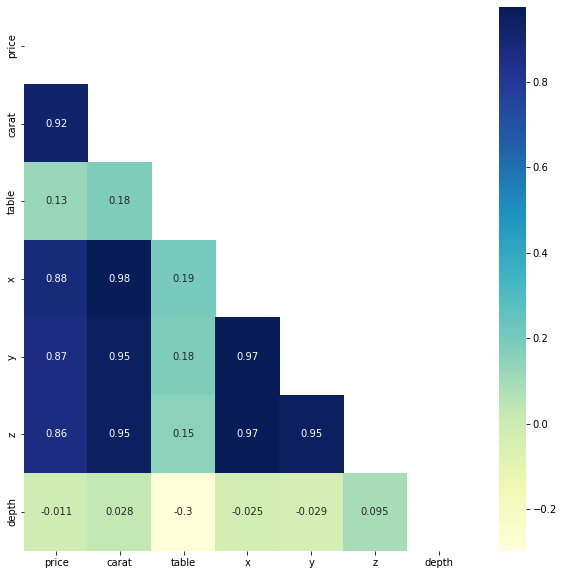

In [ ]:
# Mapa de correlações
plt.figure(figsize=(10,10))
corr = df[['price', 'carat', 'table', 'x', 'y', 'z', 'depth']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, cmap="YlGnBu", annot=True);


Retiramos X, Y e Z por terem uma correlação muito forte com o "Carat"

# 6.0. PRÉ-PROCESSAMENTO DOS DADOS
---

## 6.1. Transformação de Natureza

In [ ]:
# Cópia e transformação de variável para log
df6 = df.copy()
# df6['price'] = np.log(df6['price'])

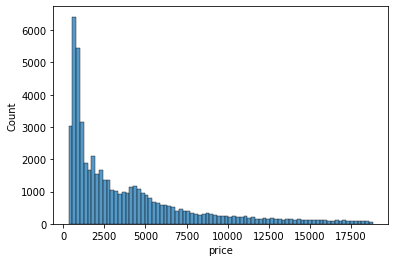

In [ ]:
sns.histplot(x='price', data=df6);

## 6.2. Encoding

In [ ]:
# Definição das variáveis numéricas e categóricas
var_num = ['carat','depth', 'table']
var_cat = ['cut', 'color', 'clarity']

# Ordenação das variáveis
df6 = df6[['carat', 'depth', 'table', 'cut', 'color', 'clarity', 'price']]

# Dicionário para encoding
cut = {'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}
color = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}
clarity = {'I1':1,  'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

# Encoding das variáveis categóricas
df6['cut'] = df6['cut'].replace(cut)
df6['color'] = df6['color'].replace(color)
df6['clarity'] = df6['clarity'].replace(clarity)

In [ ]:
df6.head()

,carat,depth,table,cut,color,clarity,price
0,0.23,61.5,55.0,5,6,2,326
1,0.21,59.8,61.0,4,6,3,326
2,0.23,56.9,65.0,2,6,5,327
3,0.29,62.4,58.0,4,2,4,334
4,0.31,63.3,58.0,2,1,2,335


## 6.3. Divisão dos dados em Treino e Teste

In [ ]:
# Variável dependente e independentes
X = df6.drop('price', axis=1).values
y = df6['price'].values

In [ ]:
# 80% para treino, e 20% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 6.4. Rescaling

In [ ]:
# Definindo o robust scaler
rs = RobustScaler()

# Transformando as colunas
X_train[:, :5] = rs.fit_transform(X_train[:, :5])
X_test[:, :5] = rs.transform(X_test[:, :5])


# # Definindo o Standard Scaler
# ss = StandardScaler()
# # Transformando as colunas
# X_train[:, :5] = ss.fit_transform(X_train[:, :5])
# X_test[:, :5] = ss.transform(X_test[:, :5])

# 7.0 Aplicação dos modelos


## 7.1 MMQ

In [ ]:
# %%timeit -n 100

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [ ]:
mmq_coef=model.coef_

In [ ]:
from sklearn.metrics import mean_squared_error

# EQM
ols_mse = mean_squared_error(y_pred, y_test)
ols_rmse = np.sqrt(ols_mse)
ols_score = model.score(X_test, y_test)

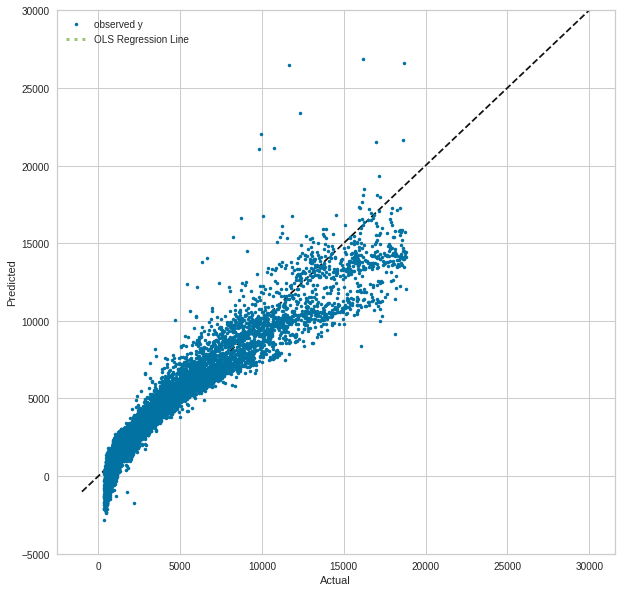

In [ ]:
plt.figure(figsize=(10,10))
# ax=sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
# x_lim = plt.xlim()
# y_lim = plt.ylim()
plt.plot([-1000,30000], [-1000,30000], "k--") # 45 graus

plt.plot(y_test, y_pred, '.', label='observed y');
# plt.plot(x, a * x + b, 'r', label='true y', lw=3, alpha=0.4);
plt.plot(y_test, model.coef_[0] * y_test + model.intercept_ , label='OLS Regression Line', c='C1', ls='dotted', lw=3, )
plt.legend();

plt.ylim([-5000, 30000])

plt.show()

In [ ]:
from sklearn.metrics import r2_score

# R2
model = LinearRegression()
model_ = model.fit(X_train, y_train)
y_pred=model.predict(X_test)

ols_r2 = r2_score(y_test, y_pred)
ols_r2

0.9049476971503353

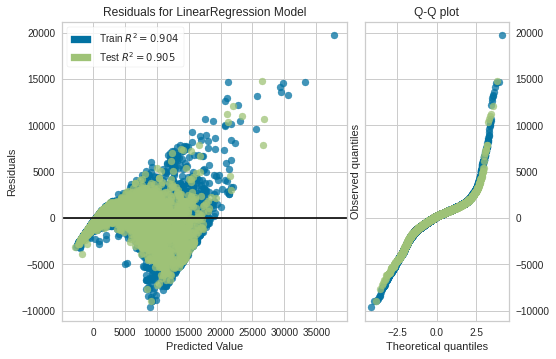

<Figure size 720x720 with 0 Axes>

In [ ]:
from yellowbrick.regressor import ResidualsPlot

model = LinearRegression()
model.fit(X_train, y_train)

visualizer = ResidualsPlot(model, hist=False, qqplot=True)

plt.figure(figsize=(10,10))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

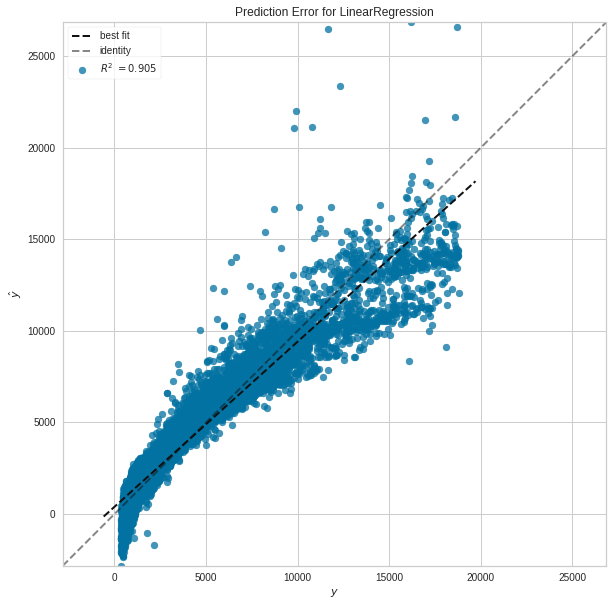

In [ ]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(model)

plt.figure(figsize=(10,10))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data


## 7.2 Ridge

In [ ]:
from sklearn.linear_model import RidgeCV
cros_val = RidgeCV(cv=10)
cros_val.fit(X=X_train, y=y_train)
best_alpha=cros_val.alpha_
print(best_alpha)

1.0



Melhor Alpha: 0.085


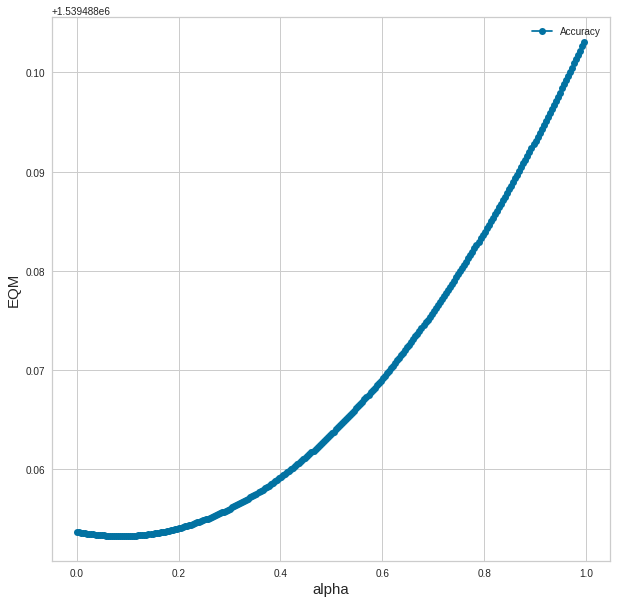

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn.metrics import mean_squared_error


cv = KFold(n_splits=10, shuffle=True, random_state=1)


macc = []
va = []

for i in range(1,1001,4):
  a = i/1000
  vacc = []

  for train_index, test_index in cv.split(X_train, y_train):

      X2_train, X2_test = X_train[train_index], X_train[test_index]
      y2_train, y2_test = y_train[train_index], y_train[test_index]

      model = Ridge(alpha=a)
      model.fit(X2_train,y2_train)
      y_pred = model.predict(X2_test) 
      score = mean_squared_error(y_pred, y2_test)

      vacc.append(score)

  macc.append(np.mean(vacc))
  va.append(a)
  # print('alpha:', a, end=' | ')
  # print('Average accuracy:', np.mean(vacc), end=' | ')
best_alpha = range(1,1001,4)[np.argmin(macc)]/1000
print()
print('Melhor Alpha:', best_alpha)
plt.figure(figsize=(10,10))
plt.plot(va, macc, '-bo', label = 'Accuracy')
plt.xlabel('alpha', fontsize = 15)
plt.ylabel('EQM', fontsize = 15)
plt.legend()
plt.show()

In [ ]:
# %%timeit -n 100

from sklearn.linear_model import Ridge
model = Ridge(alpha=best_alpha)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

ridge_coef=model.coef_

In [ ]:
from sklearn.metrics import mean_squared_error
ridge_mse = mean_squared_error(y_pred, y_test)
ridge_rmse = np.sqrt(ridge_mse)
ridge_score = model.score(X_test, y_test)

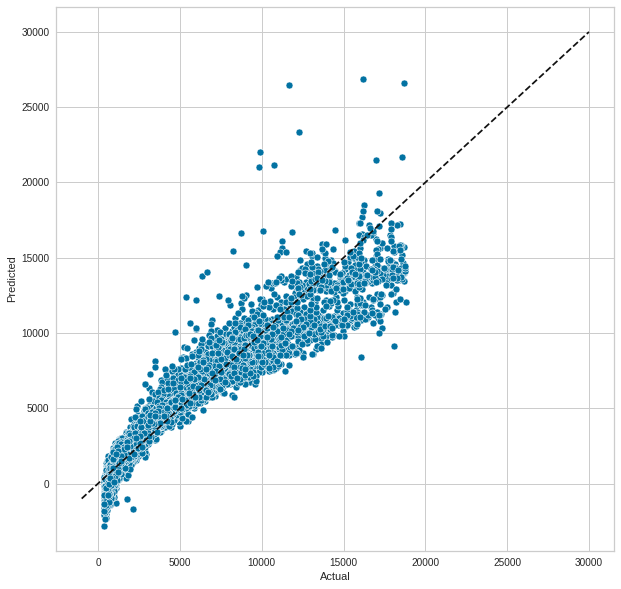

In [ ]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot([-1000,30000], [-1000,30000], "k--")
plt.show()

In [ ]:
from sklearn.metrics import r2_score

# R2
model = Ridge(alpha=best_alpha)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

ridge_r2 = r2_score(y_test, y_pred)
ridge_r2

0.9049476644691589

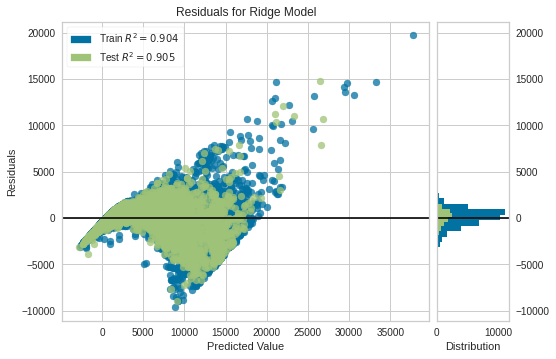

In [ ]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

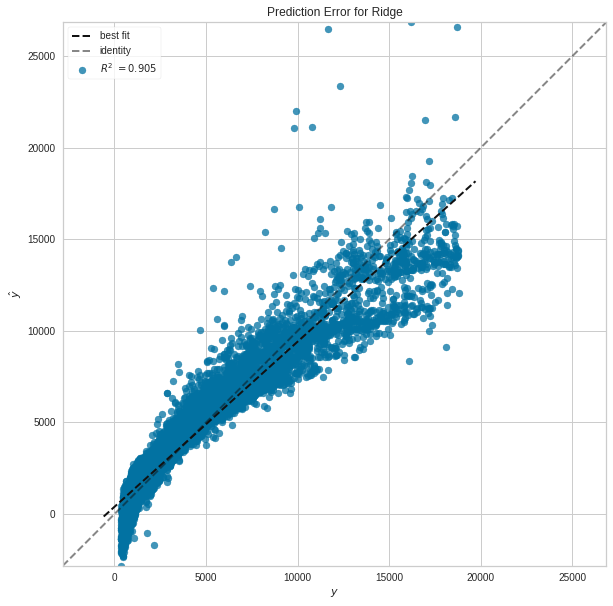

In [ ]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(model)

plt.figure(figsize=(10,10))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data


## 7.3 Lasso

100%|██████████| 250/250 [01:03<00:00,  3.94it/s]



Melhor Alpha: 0.001


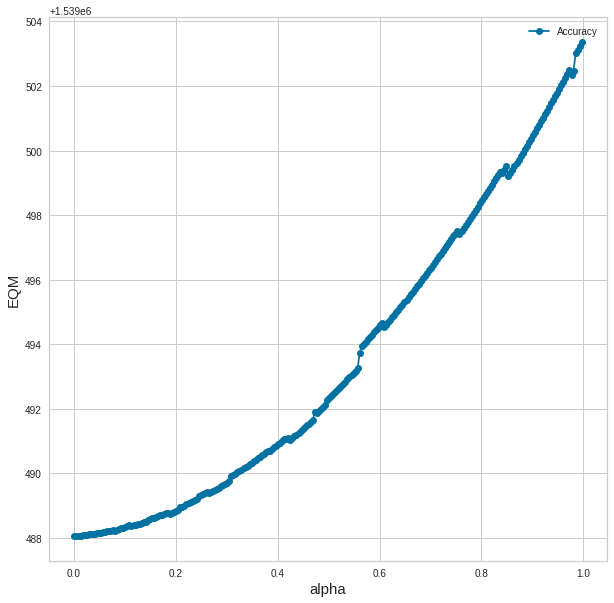

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold

from sklearn.metrics import mean_squared_error

from tqdm import tqdm

cv = KFold(n_splits=10, shuffle=True, random_state=1)


macc = []
va = []

for i in tqdm(range(1,1001,4)):
  a = i/1000
  vacc = []

  for train_index, test_index in cv.split(X_train, y_train):

      X2_train, X2_test = X_train[train_index], X_train[test_index]
      y2_train, y2_test = y_train[train_index], y_train[test_index]

      model = Lasso(alpha=a)
      model.fit(X2_train,y2_train)
      y_pred = model.predict(X2_test) 
      score = mean_squared_error(y_pred, y2_test)

      vacc.append(score)

  macc.append(np.mean(vacc))
  va.append(a)
  # print('alpha:', a, end=' | ')
  # print('Average accuracy:', np.mean(vacc), end=' | ')
best_alpha = [i/1000 for i in range(1,201)][np.argmin(macc)]
print()
print('Melhor Alpha:', best_alpha)
plt.figure(figsize=(10,10))
plt.plot(va, macc, '-bo', label = 'Accuracy')
plt.xlabel('alpha', fontsize = 15)
plt.ylabel('EQM', fontsize = 15)
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LassoCV
cros_val = LassoCV(cv=10,random_state=0,alphas=[i/1000 for i in range(1,1001,4)])
cros_val.fit(X=X_train, y=y_train)
best_alpha=cros_val.alpha_
print(best_alpha)

0.017


In [ ]:
# %%timeit -n 100

from sklearn.linear_model import Lasso
model = Lasso(alpha=best_alpha)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

lasso_coef=model.coef_

In [ ]:
from sklearn.metrics import mean_squared_error

lasso_mse = mean_squared_error(y_pred, y_test)
lasso_rmse = np.sqrt(lasso_mse)
lasso_score = model.score(X_test, y_test)

In [ ]:
from sklearn.metrics import r2_score

# R2
model = Lasso(alpha=best_alpha)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

lasso_r2 = r2_score(y_test, y_pred)
lasso_r2

0.9049476937014573

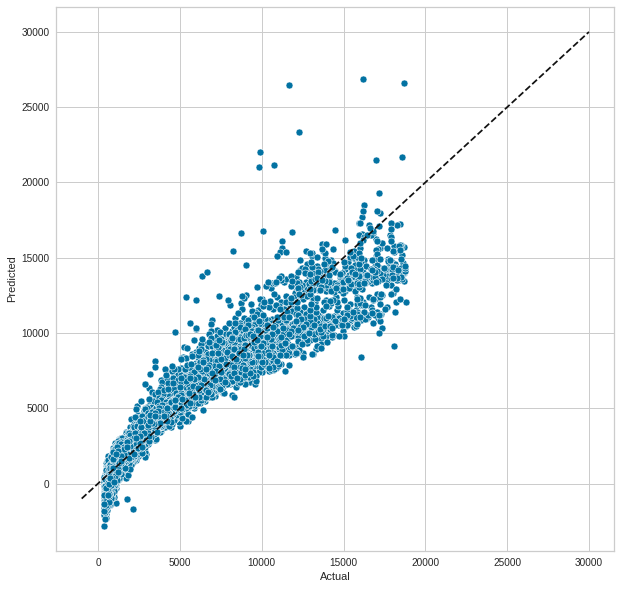

In [ ]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot([-1000,30000], [-1000,30000], "k--")
plt.show()

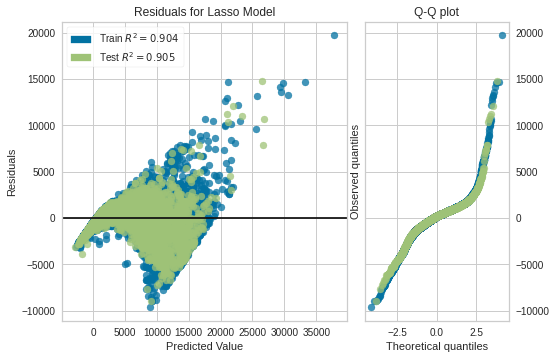

In [ ]:
from yellowbrick.regressor import ResidualsPlot

from sklearn.linear_model import Lasso
model = Lasso(alpha=best_alpha)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)


visualizer = ResidualsPlot(model,hist=False, qqplot=True)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

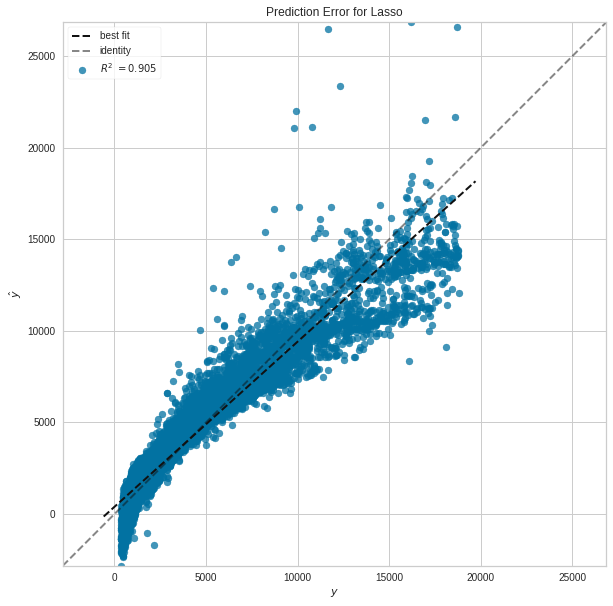

In [ ]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(model)

plt.figure(figsize=(10,10))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

## 7.4 Resultados

In [ ]:
coefs=pd.DataFrame({'Variável':df6.columns[:-1],
                    'MMQ':mmq_coef,
                    'Ridge':ridge_coef,
                    'Lasso':lasso_coef})

In [ ]:
coefs

,Variável,MMQ,Ridge,Lasso
0,carat,5628.327397,5628.299200,5628.259422
1,depth,-68.529658,-68.529537,-68.507584
2,table,-75.584460,-75.581568,-75.547551
3,cut,246.287643,246.285802,246.259260
4,color,951.496820,951.480060,951.421010
5,clarity,523.008120,523.003431,522.995752


In [ ]:
# print('Modelo\tEQM\t\trEMQ\tR2\tAcurácia\tTempo Médio (100 loops)')
# print(f'MMQ\t{round(ols_mse,4)}\t{round(ols_rmse,5)}\t{round((ols_score*100),4)}%\t27.4')
# print(f'Ridge\t{round(ridge_mse,4)}\t{round(ridge_rmse,5)}\t{round((ridge_score*100),4)}%\t11.3')
# print(f'Lasso\t{round(lasso_mse,4)}\t{round(lasso_rmse,5)}\t{round((lasso_score*100),4)}%\t19.7')

In [ ]:
modelos = ['MMQ', 'Ridge', 'Lasso']
EQM = [round(i, 4) for i in [ols_mse, ridge_mse, lasso_mse]]
rEQM = [round(i, 5) for i in [ols_rmse, ridge_rmse, lasso_rmse]]
R2 = [round(i, 4) for i in [ols_r2, ridge_r2, lasso_r2]]
acuracia = ['90.4948%','90.4948%', '90.4948%']
tempo = ['27.4 ms', '11.3 ms', '19.7 ms']

resultados = pd.DataFrame(data={
    'Modelos': modelos,
    'EQM': EQM,
    'rEQM': rEQM,
    'R2': R2,
    'Acurácia': acuracia,
    'Tempo Médio (100 loops)': tempo
})

pd.set_option('display.float_format', '{:.5f}'.format)
resultados.set_index('Modelos')

,EQM,rEQM,R2,Acurácia,Tempo Médio (100 loops)
Modelos,,,,,
MMQ,1448793.87450,1203.65854,0.90490,90.4948%,27.4 ms
Ridge,1448794.37260,1203.65874,0.90490,90.4948%,11.3 ms
Lasso,1448794.77920,1203.65891,0.90490,90.4948%,19.7 ms


# 8.0 Referências

[Scikit Learn LassoCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)<br>
[Scikit Learn RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)<br>
[Kaggle Diamond Pricing Modelling](https://www.kaggle.com/code/tobby1177/diamond-price-modelling/notebook)<br>
[Scikit Yellowbrick Residuals](https://www.scikit-yb.org/en/latest/api/regressor/residuals.html)<br>
[Scikit Yellowbrick Prediction Error Plot](https://www.scikit-yb.org/en/latest/api/regressor/peplot.html)
[Visualizing Linear Ridge and Lasso Regression Performance](https://towardsdatascience.com/visualizing-linear-ridge-and-lasso-regression-performance-6dda7affa251)<br>
[Lasso Regression Plot](https://h1ros.github.io/posts/lasso-regression/)

# 9.0 Curiosidades

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
rf_mse = mean_squared_error(y_pred, y_test)
rf_rmse = np.sqrt(rf_mse)
rf_score = model.score(X_test, y_test)

rf_coef=model.feature_importances_

In [ ]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot([0,20000], [0,20000], "k--")
plt.show()

In [ ]:
print('Modelo\tEQM\t\t\trEMQ\t\t\tAcurácia')
print(f'MMQ\t{ols_mse}\t{ols_rmse}\t{round((ols_score*100),4)}%')
print(f'Ridge\t{ridge_mse}\t{ridge_rmse}\t{round((ridge_score*100),4)}%')
print(f'Lasso\t{lasso_mse}\t{lasso_rmse}\t{round((lasso_score*100),4)}%')
print(f'RF\t{rf_mse}\t{rf_rmse}\t{round((rf_score*100),4)}%')




In [ ]:
coefs=pd.DataFrame({'Variável':df6.columns[:-1],
                    'MMQ':mmq_coef,
                    'Ridge':ridge_coef,
                    'Lasso':lasso_coef,
                    'Random Forest':rf_coef})

In [ ]:
coefs